In [7]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output

In [8]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/'
repLC='LC/'
fnTests='noreptests.csv' # REMEMBER TO NOT COUNT UNTIL -1
fnDesc='norepmorphdesc.csv' # REMEMBER TO COUNT UNTIL -1

In [9]:
# LC alpha parameter values
LCAlpha = ['0/','10/','20/','30/','40/','50/','60/','70/','80/','90/','100/']
numAlphaValues = len(LCAlpha)

In [10]:
# Get all directories
foldLC = []
for i in range(numAlphaValues):
    tempLC = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(repository + repLC + LCAlpha[i]):
        for folder in d:
            tempLC.append(os.path.join(r, folder))
            print(folder)
    foldLC.append(tempLC)

linearCombination_29_3_18-56-18-8978
linearCombination_27_3_16-58-11-1314
linearCombination_27_3_16-48-26-6330
linearCombination_27_3_16-37-42-2315
linearCombination_27_3_16-2-25-5965
linearCombination_27_3_15-8-54-4256
linearCombination_27_3_12-22-33-3716
linearCombination_25_3_0-17-47-7067
linearCombination_25_3_0-17-47-7065
linearCombination_25_3_0-17-47-7070
linearCombination_25_3_0-17-47-7061


In [11]:
# See directories
print("LC = ", len(foldLC))

LC =  11


In [12]:
# Get information from files
# BL
repTestsLC = []
repManLC = []
for i in range(numAlphaValues):
    tempRepTestsLC = []
    tempRepManLC = []
    for f in foldLC[i]:
        my_list_tests = []
        my_list_man = []
        with open(f + '/' + fnTests, 'r') as testCsvfile, \
        open(f + '/' + fnDesc, 'r') as descCsvfile:
            dataTests = csv.reader(testCsvfile, delimiter=',', quotechar='"')
            dataMan = csv.reader(descCsvfile, delimiter=',', quotechar='"')
            for row in dataTests:
                my_list_tests.append(row[:-1]) 
            for row in dataMan:
                my_list_man.append(row[:-1]) 
        tempRepTestsLC.append(my_list_tests)
        tempRepManLC.append(my_list_man)
    repTestsLC.append(tempRepTestsLC)
    repManLC.append(tempRepManLC)

In [13]:
for i in range(numAlphaValues):
    population = 40
    replicates = len(foldLC[i])
    #replicates = 15
    evaluations = len(repTestsLC[i][0])
    #evaluations = 20000
    features = len(repTestsLC[i][0][0])
    generations = int(evaluations / population)
    print("Replicates: ", replicates, "Evaluations: ", evaluations, "Features: ", features, "Generations: ", generations)

Replicates:  1 Evaluations:  14541 Features:  5 Generations:  363
Replicates:  1 Evaluations:  12386 Features:  5 Generations:  309
Replicates:  1 Evaluations:  13121 Features:  5 Generations:  328
Replicates:  1 Evaluations:  12209 Features:  5 Generations:  305
Replicates:  1 Evaluations:  12487 Features:  5 Generations:  312
Replicates:  1 Evaluations:  6938 Features:  5 Generations:  173
Replicates:  1 Evaluations:  13357 Features:  5 Generations:  333
Replicates:  1 Evaluations:  11189 Features:  5 Generations:  279
Replicates:  1 Evaluations:  15821 Features:  5 Generations:  395
Replicates:  1 Evaluations:  14276 Features:  5 Generations:  356
Replicates:  1 Evaluations:  12920 Features:  5 Generations:  323


In [14]:
print(repTestsLC[0][0][1])

['3', '0', '1', '0', '0.0423598']


In [21]:
# Manufacturable robots
sumTestsRepLC = []
for i in range(numAlphaValues):
    tempSumTestsRepLC = []
    for j in range(replicates):
        dat = np.array([[float(y) for y in x] for x in repTestsLC[i][j]]) # Convert to array
        counter = 0
        for k in range(len(repTestsLC[i][j])):
            if(dat[k,1] > 0 \
               and dat[k,2] > 0 \
               and dat[k,3] > 0 \
              ):
                counter = counter + 1
        #tempSumTestsRepLC.append(counter/len(repTestsLC[i][j]))
        tempSumTestsRepLC.append(counter)
        print(j)
    print("Done!")
    print(tempSumTestsRepLC)
    sumTestsRepLC.append(tempSumTestsRepLC)

0
Done!
[56]
0
Done!
[94]
0
Done!
[56]
0
Done!
[14]
0
Done!
[16]
0
Done!
[3]
0
Done!
[13]
0
Done!
[1]
0
Done!
[3]
0
Done!
[41]
0
Done!
[2]


In [16]:
# Process data
repResLC = []
for i in range(numAlphaValues):
    tempRepResLC = []
    for rep in range(replicates):
        dat = np.array([[float(y) for y in x] for x in repManLC[i][rep]]) # Convert to array
        tempRepResLC.append(dat)
    repResLC.append(tempRepResLC)
print("Done!")

Done!


In [17]:
repDistLC = []
for i in range(numAlphaValues):
    tempRepDistLC = []
    for rep in range(replicates):
        temAve = []
        for j in range(len(repResLC[i][rep])):
            print("Pam: ", i, "Rep: ", rep, " Prog: ", j/len(repResLC[i][rep]))
            temDis = []
            for k in range(len(repResLC[i][rep])):
                dist = np.linalg.norm(repResLC[i][rep][j][1:]-repResLC[i][rep][k][1:])
                temDis.append(dist)
            sortedList = np.sort(temDis)
            temAve.append(np.mean(sortedList[:14]))
            clear_output(wait=True)
        tempRepDistLC.append(np.mean(temAve))
    repDistLC.append(tempRepDistLC)
print("LC -> Done!")

LC -> Done!


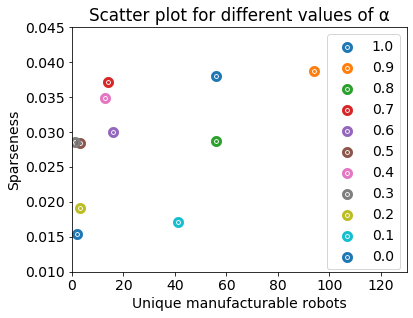

In [41]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)
plt.figure(figsize=(6, 4.5))
#plt.xlabel("Proportion of unique manufacturable robots")
plt.xlabel("Unique manufacturable robots")
plt.ylabel("Sparseness")
for i in range(numAlphaValues):
    plt.scatter(sumTestsRepLC[i],repDistLC[i],marker='.',linewidths=8.0)
axes = plt.gca()
#axes.set_xlim([0,0.015])
axes.set_xlim([0,130])
axes.set_ylim([0.01,0.045])
# axes = plt.gca()
# title = experimentName + ': ' + xVariable + '-' + yVariable
plt.title('Scatter plot for different values of \u03B1')
plt.legend(["1.0", "0.9", "0.8", "0.7", "0.6", "0.5", "0.4", "0.3", "0.2", "0.1", "0.0"])
# plt.xticks(posX,rangeX)
# plt.yticks(posX,rangeX)


plt.savefig(repository+'SpaManVSDiv.png', dpi=200)